### Set up the environment 

In [1]:
# Prepare the environment for loading the files
import os
import pandas as pd
import numpy as np
import datetime as datetime
from datetime import date, time, datetime
import seaborn as sns
import matplotlib.pyplot as plt


### Read and import files

In [2]:
airports = pd.read_csv("./airports.csv")
carriers = pd.read_csv("./carriers.csv")
planes = pd.read_csv("./plane-data.csv")

### Import flight data from 2004 to 2006

In [3]:
df_2004 = pd.read_csv("./2004.csv")
df_2005 = pd.read_csv("./2005.csv")
df_2006 = pd.read_csv("./2006.csv")


### Combine the flight data into one data frame, rename the 'Dayof Month' column to'Day', for further combine the 'Year', 'Month, and 'Day' columns into 'Date', and convert the 'Date' column to datetime format

In [4]:
df_all = pd.concat([df_2004,df_2005,df_2006], ignore_index = True)
df_all.rename(columns = {'DayofMonth': 'Day'}, inplace = True)

df_all['Date'] = pd.to_datetime(df_all[['Year','Month','Day']])



### Data wranging for Q1

In [5]:
# Create subset from the original flight  data  frame
sub_all = df_all[['Date','DayOfWeek','DepTime','ArrTime', 'ArrDelay','DepDelay','Cancelled','Diverted']]

# Rename the columns
sub_all.columns = ['Date','Week','DepTime','ArrTime', 'ArrDelay','DepDelay','Cancelled','Diverted']

# For values in column 'Week', change the format to the day of week from the 'Date' column
sub_all['Week'] = [datetime.weekday(d) for d in sub_all['Date'] ]

# Change the format of values in columns 'Year', 'Month', 'Day', to be the year, month, and day from the 'Date' column
sub_all['Month'] = sub_all['Date'].dt.strftime('%m')
sub_all['Year'] = sub_all['Date'].dt.strftime('%Y')
sub_all['Day'] = sub_all['Date'].dt.strftime('%d')

# Filter out records with 0 cancelled, 0 diverted, and departure delays with more than 15 minutes
fil_sub = sub_all[(sub_all['Cancelled']==0) & (sub_all['Diverted']==0) & (sub_all['DepDelay']>15)]


C:\Users\User\AppData\Local\Temp\ipykernel_24592\3305293033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_all['Week'] = [datetime.weekday(d) for d in sub_all['Date'] ]
C:\Users\User\AppData\Local\Temp\ipykernel_24592\3305293033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_all['Month'] = sub_all['Date'].dt.strftime('%m')
C:\Users\User\AppData\Local\Temp\ipykernel_24592\3305293033.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### The best day of week to travel

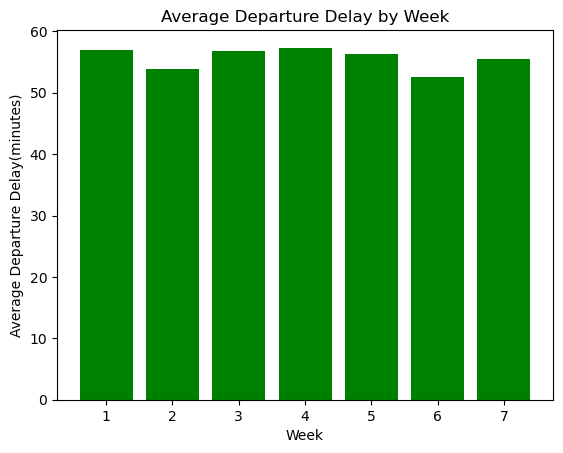

In [6]:
# Q1 for week
q1a = fil_sub.groupby(['Week']).mean(['DepDelay'])
q1a = q1a.sort_values(by=['Week'])
q1a = q1a.dropna()
q1_week = q1a['DepDelay']

# Plot a bar chart showing the average delay by week
plt.bar(q1_week.index, q1_week, color='Green')
plt.xlabel('Week')
plt.ylabel('Average Departure Delay(minutes)')
plt.title('Average Departure Delay by Week')

# Modify the x-tick labels to be from 1 to 7
plt.xticks(q1_week.index, range(1, 8))
plt.show()

### The best time of the year to travel

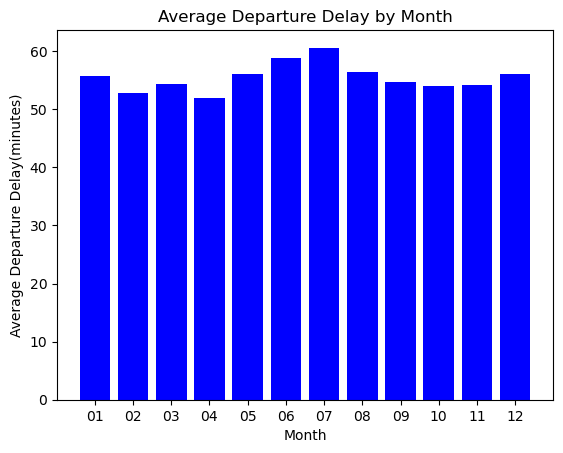

In [7]:
# Q1 for month 
q1b = fil_sub.groupby(['Month']).mean(['DepDelay'])
q1b = q1b.sort_values(by=['Month'])
q1_month = q1b['DepDelay']

# Plot a bar chart showing the average delay by month
plt.bar(q1_month.index, q1_month,color='Blue')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay(minutes)')
plt.title('Average Departure Delay by Month')
plt.show()


### Data wrangling for Q1 by time

In [8]:
# Convert the values in departure and arrival time columns into numeric
sub_all['DepTime'] = pd.to_numeric(sub_all['DepTime'], errors = 'coerce')
sub_all['ArrTime'] = pd.to_numeric(sub_all['ArrTime'], errors = 'coerce')


q1c = sub_all.loc[(sub_all['Cancelled']==0) & # Select records with 0 cancelled, 0 diverted
                  (sub_all['Diverted']==0) &
                  (sub_all['DepDelay']>15)&  #Select records with departure delay is more than 15 minutes
                  (sub_all['ArrTime'].between(0,2400))&  # Limit records of departure and arrival time between 0 to 2400
                  (sub_all['DepTime'].between(0,2400))]


# Define the time interval and categories
bins = [0,5, 11, 16, 19, 22,24]
labels = ["Dawn","Morning","Afternoon","Evening","Night","Midnight"]

# Convert the first 2 number of the departure time to numeric
q1c['DepHour'] = pd.to_numeric(q1c["DepTime"].astype(str).str[:2])

# Create a new column "Time" with the time interval for each flight's departure time
q1c["Time"] = pd.cut(q1c["DepHour"], bins=bins, labels=labels)


C:\Users\User\AppData\Local\Temp\ipykernel_24592\354115642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_all['DepTime'] = pd.to_numeric(sub_all['DepTime'], errors = 'coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_24592\354115642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_all['ArrTime'] = pd.to_numeric(sub_all['ArrTime'], errors = 'coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_24592\354115642.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

### The best time of the day to travel

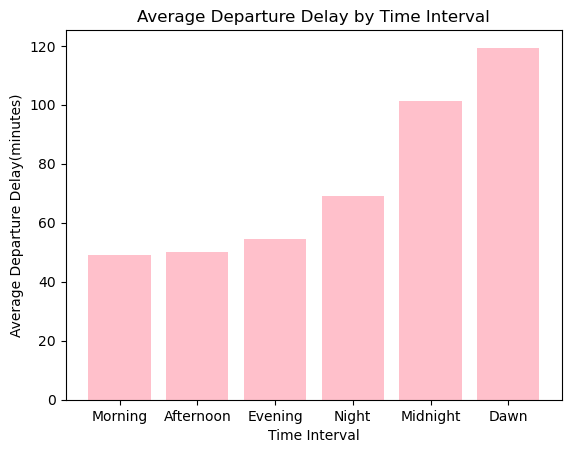

In [9]:
q1d= q1c.groupby('Time')['DepDelay'].mean()
q1d = q1d.sort_values()

# Create a bar chart showing the average delay by time interval
plt.bar(q1d.index, q1d, color='pink')
plt.xlabel('Time Interval')
plt.ylabel('Average Departure Delay(minutes)')
plt.title('Average Departure Delay by Time Interval')
plt.show()



### Data wrangling for Q2

In [10]:
#create subset from the original data
q2_sub = df_all[['TailNum', 'ArrDelay','DepDelay','Cancelled','Diverted']]
q2_sub.columns = q2_sub.columns.str.lower()
pl_sub = planes[['tailnum','issue_date','model']]


# Join the data with planes 
q2_join = pd.merge(q2_sub, pl_sub, on = 'tailnum')

# Filter out records without cancelled and diverted with departure delay more than 15 minutes
q2_join = q2_join[(q2_join['cancelled']==0) & (q2_join['diverted']==0) & (q2_join['depdelay']>15)]

# Replace the 'None' in issue_date to NA
q2_join = q2_join.replace('None', pd.NaT)
q2_join = q2_join .dropna()

# Convert it to datetime format
q2_join['issue_date'] = pd.to_datetime(q2_join['issue_date'])
q2_join['issue_date'] = q2_join['issue_date'].dt.strftime('%Y/%m/%d')
q2_join['issue_date'] = pd.to_datetime(q2_join['issue_date'])

# Create 'pl_age' column as the age of planes
current_year = datetime.now().year
q2_join['pl_age'] = current_year - q2_join['issue_date'].dt.year 


### Does the plane age affect the average departure delays?

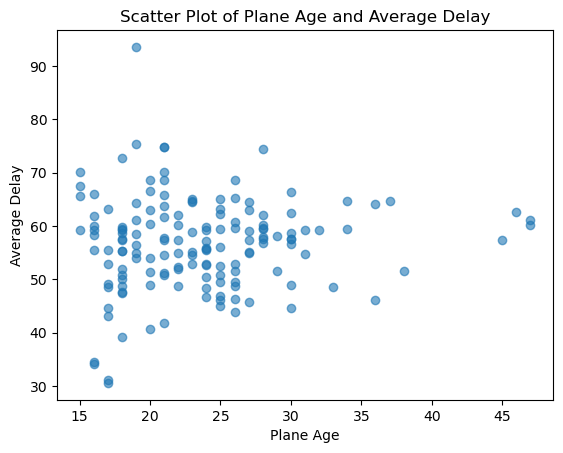

In [13]:
# Q2
q2a = q2_join.groupby('model').agg(avg_delay=('depdelay', 'mean'), plane_age=('pl_age', 'first')).reset_index().sort_values('plane_age')

# Create a scatter plot to visualize the results
plt.scatter(q2a['plane_age'], q2a['avg_delay'], alpha=0.6)
plt.xlabel('Plane Age')
plt.ylabel('Average Delay')
plt.title('Scatter Plot of Plane Age and Average Delay')
plt.show()

### Data wrangling for Q3

In [14]:
# Create a subset from the original dataframe
df_fl = df_all[['Year','UniqueCarrier','Origin','Dest']]
sub_airports = airports[['iata','airport','city','state']]

#  Join the data with airports file to get the cities and states according to the iata of origin airports
q3a = pd.merge(df_fl, sub_airports, how = 'left', left_on='Origin', right_on='iata')
q3a.drop('iata', axis=1, inplace =True)

# Rename the columns
q3a_rnm = {'airport': 'org_airport',
          'city': 'org_city',
          'state': 'org_state'}
q3a.rename(columns=q3a_rnm, inplace = True)

#  Join the data with airports file to get the cities and states according to the iata of destination airports
q3b = pd.merge(q3a, sub_airports, how = 'left', left_on='Dest', right_on='iata')
q3b.drop('iata', axis=1, inplace =True)

# Rename the columns
q3b_rnm = {'airport': 'dest_airport',
          'city': 'dest_city',
          'state': 'dest_state'}
q3b.rename(columns=q3b_rnm, inplace = True)



### The travel pattern over the years

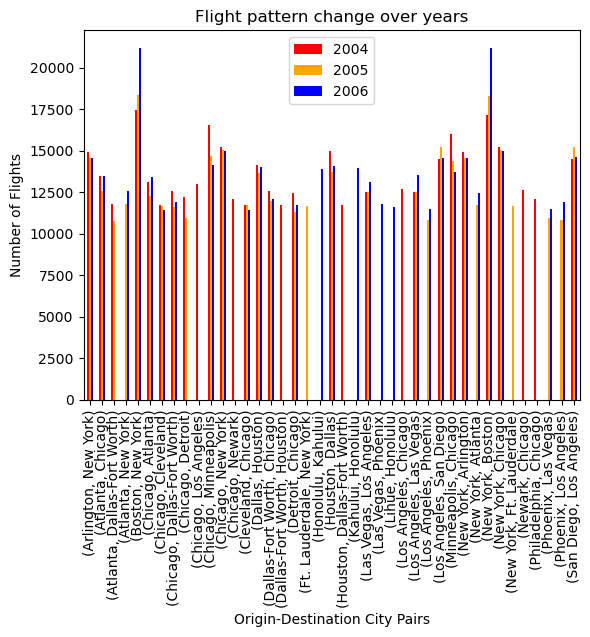

In [15]:
#  Group by the data and create the Frequency column to show the number of flights at each city
q3c = q3b.groupby(['org_city','dest_city','Year']).size().reset_index(name='Frequency')

# Arrange the data in descending
q3c = q3c.sort_values(by='Frequency', ascending=False)

# Choose the top 30 records with the most frequent flights for each year
top= q3c.groupby('Year').head(30)

# Sum up the frequency of flights in each city
q3d = top.groupby(['org_city','dest_city', 'Year'])['Frequency'].sum().reset_index()

# Create a pivot table for the data
q3d_pivot = q3d.pivot(index=['org_city','dest_city'], columns='Year', values='Frequency')

# Create a grouped bar chart to visualise the results
q3d_pivot.plot(kind='bar', stacked=False, color=['red', 'orange', 'blue'])
plt.xlabel('Origin-Destination City Pairs')
plt.ylabel('Number of Flights')
plt.title('Flight pattern change over years')
plt.legend(['2004', '2005', '2006'])
plt.show()

### Data wrangling for Q4

In [16]:
# Subset the data from the original data
df_q4 = df_all[['Date','DepTime','ArrTime','TailNum','ArrDelay','DepDelay','Origin','Dest','Cancelled','Diverted']]
ap_q4 = airports[['iata','airport','city','state']]

# Join the data with airports file to get the cities and states according to the iata of origin airports
q4a = pd.merge(df_q4, ap_q4, left_on='Origin', right_on='iata', how='left')
q4a.drop('iata', axis=1, inplace =True)

# Rename the columns
q4a_rnm = {'airport': 'org_airport',
          'city': 'org_city',
          'state': 'org_state'}
q4a.rename(columns=q4a_rnm, inplace = True)

# Join the data with airports file to get the cities and states according to the iata of destination airports
q4b = pd.merge(q4a, ap_q4, left_on='Dest', right_on='iata', how='left')
q4b.drop('iata', axis=1, inplace =True)

# Rename the columns
q4b_rnm = {'airport': 'dest_airport',
          'city': 'dest_city',
          'state': 'dest_state'}
q4b.rename(columns=q4b_rnm, inplace = True)
q4b = q4b.dropna()

# Limit the departure and arrival time between 0 to 2400
clean_q4b = (q4b['DepTime'] >= 0) & (q4b['DepTime'] <= 2400) & (q4b['ArrTime'] >= 0) & (q4b['ArrTime'] <= 2400) 
    
q4c = q4b.loc[clean_q4b]

# Filter the data with zero cancelled and diverted flights
q4d = q4c[(q4c["Cancelled"] == 0) & (q4c["Diverted"] == 0)]

# Create a column to show that whether the flight is delayed
q4e = q4d.assign(count_depdelay=np.where(q4d['DepDelay'] > 15, 1, 0))
q4f = q4e.assign(count_arrdelay=np.where(q4d['ArrDelay'] > 15, 1, 0))
q4f = q4f.dropna()

### Cascading delays detection

C:\Users\User\AppData\Local\Temp\ipykernel_24592\3740104546.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  q4g = q4f.groupby(['org_airport', 'dest_airport','TailNum','Date'])['count_depdelay', 'count_arrdelay'].sum()


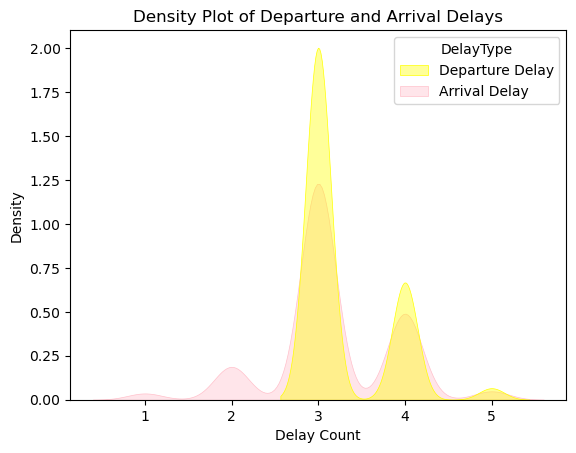

In [17]:
# Sum up the counts for departure delays at the origin airports and the counts for arrival delays at the destination airports at the specific Date accroding to the TailNum
q4g = q4f.groupby(['org_airport', 'dest_airport','TailNum','Date'])['count_depdelay', 'count_arrdelay'].sum()

# Filter those flights with delay
q4h = q4g[(q4g['count_depdelay']>0) & (q4g['count_arrdelay']>0)]

# Sort and select top 500 records by departure delay count
q4i = q4h.sort_values(by='count_depdelay', ascending=False).head(500)


# Combine departure and arrival delay counts into a single data frame
delay_data = pd.concat([
    q4i['count_depdelay'].rename('Delay Count').to_frame().assign(DelayType='Departure Delay'),
    q4i['count_arrdelay'].rename('Delay Count').to_frame().assign(DelayType='Arrival Delay')
])

# Create a density plot for departure and arrival delay counts
sns.kdeplot(
    data=delay_data, x='Delay Count', hue='DelayType', fill=True,
    alpha=0.4, linewidth=0.5, palette=['yellow', 'pink'], common_norm=False
)
plt.xlabel('Delay Count')
plt.ylabel('Density')
plt.title('Density Plot of Departure and Arrival Delays')
plt.show()

### Environment setting for Q5

In [18]:
#Q5
import sklearn
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn. preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer


### Data wrangling for Q5

In [19]:
# Create time frame categories 
q5 = df_all.loc[(df_all['ArrTime'].between(0,2400))& (df_all['DepTime'].between(0,2400))]
bins = [0,600, 900, 1200, 1800, 2100, 2400]
labels = ["Midnight","Dawn","Morning","Afternoon","Evening","Night"]
q5['dep_tf'] = pd.cut(q5['DepTime'], bins, labels = labels) #arrival time frame
q5['arr_tf'] = pd.cut(q5['ArrTime'], bins, labels = labels) #departure time frame
q5['crsarr_tf'] = pd.cut(q5['CRSArrTime'], bins, labels = labels) #scheduled arrival time frame
q5['crsdep_tf'] = pd.cut(q5['CRSDepTime'], bins, labels = labels) #scheduled departure time frame

# Create dummy variable for arrival delay
q5a= q5.assign(delayed=np.where(q5['ArrDelay'] > 15, 1, 0))

# Select a sample size of 150000 for model building
Delayed = q5a.sample(n = 150000)

C:\Users\User\AppData\Local\Temp\ipykernel_24592\1807506528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5['dep_tf'] = pd.cut(q5['DepTime'], bins, labels = labels) #arrival time frame
C:\Users\User\AppData\Local\Temp\ipykernel_24592\1807506528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5['arr_tf'] = pd.cut(q5['ArrTime'], bins, labels = labels) #departure time frame
C:\Users\User\AppData\Local\Temp\ipykernel_24592\1807506528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

#### Set up the task

In [20]:
features = ['crsdep_tf','dep_tf','CRSElapsedTime','Distance','UniqueCarrier','crsarr_tf','arr_tf']
x = Delayed[features].copy()
y = Delayed['delayed']

#### Prepare pipelines

In [21]:
numerical_features = ['Distance', 'CRSElapsedTime']

#Applying SimpleImputer and StandardScaler into Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['crsdep_tf', 'dep_tf', 'UniqueCarrier','crsarr_tf','arr_tf']
#Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

data_transformer = ColumnTransformer(
    transformers = [
        ('numerical', numeric_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])



#### Split up the train set and test set of the data

In [22]:
# Create the test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 1)

# Set the parameters
param_grid = {
    'data_transformer__numerical__imputer__strategy' : ['mean','median'],
    'data_transformer__categorical__imputer__strategy' : ['constant', 'most_frequent']
}


### Logistic Regression

In [23]:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_lr', LogisticRegression(max_iter = 10000, penalty = 'none'))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(x_train, y_train)



C:\Users\User\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\New folder\lib\site-packages\sklearn\linear_model\

GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_lr',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='none'))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### Gradient Boosting

In [24]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_gdb', GradientBoostingClassifier(random_state=2))])
grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_gdb',
                                        GradientBoostingClassifier(random_state=2))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### Penalized Logistic Regression

In [25]:
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_plr', LogisticRegression(penalty='l1', max_iter = 10000, tol=0.01, solver='saga'))])
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
grid_plr.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_plr',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='l1',
                                                           solver='saga',
                                                           tol=0.01))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### Classification Tree

In [26]:
pipe_tree = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_tree', DecisionTreeClassifier(random_state=0))])
grid_tree = GridSearchCV(pipe_tree, param_grid=param_grid)
grid_tree.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_tree',
                                        DecisionTreeClassifier(random_state=0))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### Random Forests

In [27]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_rf', RandomForestClassifier(random_state=0))])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_rf',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### Support Vector Machine

In [28]:
pipe_svm = Pipeline(steps=[('data_transformer', data_transformer),
                         ('pipe_svm', LinearSVC(random_state = 0, max_iter = 10000, tol = 0.01))])
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid)
grid_svm.fit(x_train, y_train)



GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Distance',
                                                                          'CRSElapsedTime']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['crsdep_tf',
                                                                          'dep_tf',
                                                                          'UniqueCarrier',
                                                                          'crsarr_tf',
                                                                          'arr_tf'])])),
                                       ('pipe_svm',
                                        LinearSVC(max_iter=10000,
                                                  random_state=0, tol=0.01))]),
             param_grid={'data_transformer__categorical__imputer__strategy': ['constant',
                                                                              'most_frequent'],
                         'data_transformer__numerical__imputer__strategy': ['mean',
                                                                            'median']})

### ROC Curve

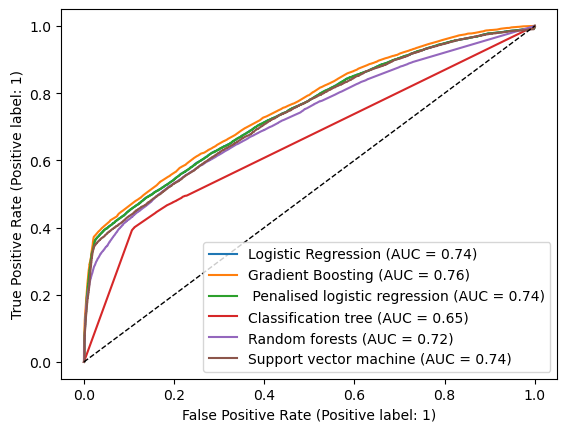

In [29]:
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, x_test, y_test, ax=ax, name = 'Logistic Regression')
RocCurveDisplay.from_estimator(grid_gdb, x_test, y_test, ax=ax, name = 'Gradient Boosting')
RocCurveDisplay.from_estimator(grid_plr, x_test, y_test, ax=ax, name = ' Penalised logistic regression')
RocCurveDisplay.from_estimator(grid_tree, x_test, y_test, ax=ax, name = 'Classification tree')
RocCurveDisplay.from_estimator(grid_rf, x_test, y_test, ax=ax, name = 'Random forests')
RocCurveDisplay.from_estimator(grid_svm, x_test, y_test, ax=ax, name = 'Support vector machine')
plt.plot([0,1], [0,1], color= 'black', lw =1, linestyle= '--')
plt.show()
